In [1]:
import sys
from packaging import version
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 


In [3]:
# Verificando versoes dos pacotes utilizados
%reload_ext watermark
%watermark - a "Daniel Henrique" - -iversions


UsageError: unrecognized arguments: - a Daniel Henrique -


In [4]:
from pathlib import Path
import tarfile
import urllib.request


# Baixando arquivo zip
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            # Extraindo tgz
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()


# Estrutura dos Dados do Dataset Housing

In [5]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Informacoes do Dataset
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Tabela de ccontagem para ocean_proximity
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Descrição dos dados, esse comando detecta para colunas numericas
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


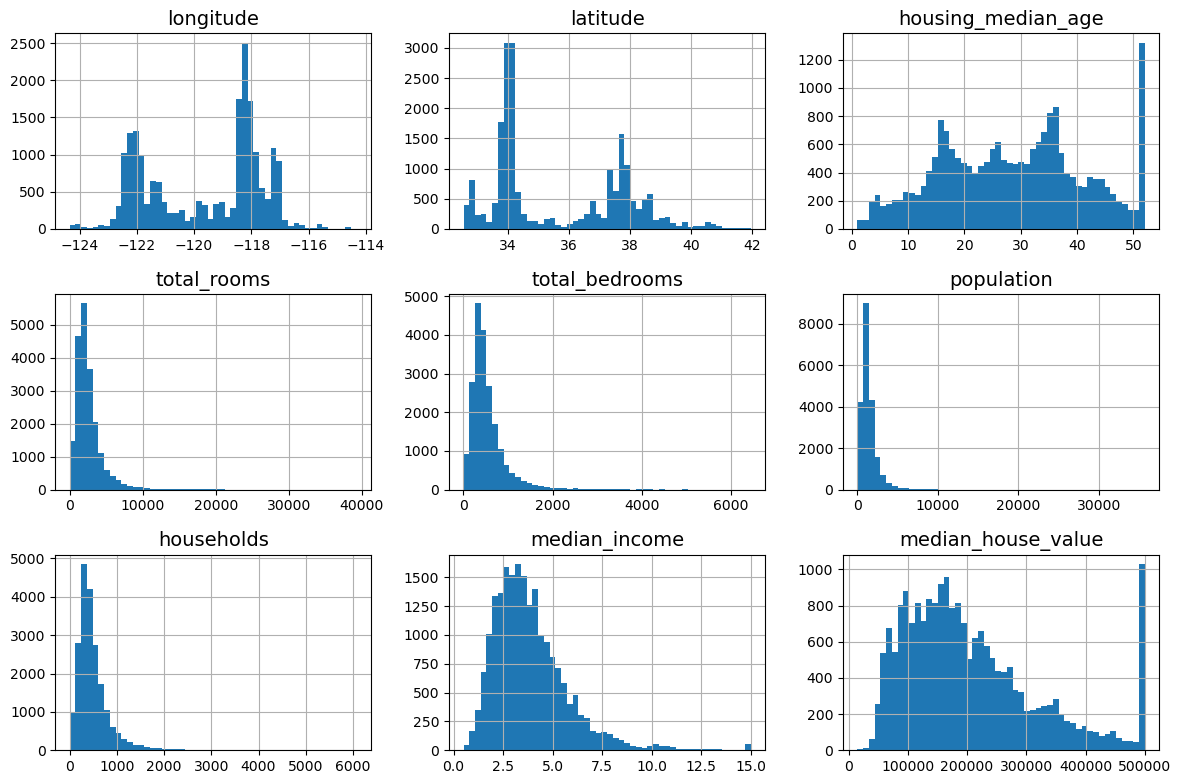

In [10]:
import matplotlib.pyplot as plt

# Exibindo Histogramas das variaveis numericas
housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()


O que temos de insight com esses histogramas.

1. Primeiro, o atributo de renda mediana não parece ser expresso em dólares americanos (USD). Depois de verificar com a equipe que coletou os dados, você é informado de que os dados foram dimensionados e limitados a 15 (na verdade, 15,0001) para rendas médias mais altas e a 0,5 (na verdade, 0,4999) para rendas medianas mais altas e em 0,5 (na verdade, 0,4999) para rendas medianas mais baixas. Os números representam aproximadamente dezenas de milhares de dólares (por exemplo, 3 na verdade significa cerca de US$ 30.000). Trabalhar com atributos pré-processados ​​é comum em Machine Learning e não é necessariamente um problema, mas você deve tentar entender como os dados foram computados.
2. A idade média da habitação e o valor médio da habitação também foram limitados. Este último pode ser um problema sério, pois é seu atributo de destino (seus rótulos). Seus algoritmos de Machine Learning podem aprender que os preços nunca ultrapassam esse limite. Você precisa verificar com sua equipe do cliente (a equipe que usará a saída do seu sistema) para ver se isso é um problema ou não. Se eles disserem que precisam de previsões precisas, mesmo além de US$ 500.000, você terá duas opções:
    * Colete etiquetas apropriadas para os distritos cujos rótulos foram tampados.
    * Remova esses distritos do conjunto de treinamento (e também do conjunto de teste, já que seu sistema não deve ser avaliado de forma inadequada se prever valores além de US$ 500.000).
3. Esses atributos têm escalas muito diferentes. Discutiremos isso mais adiante neste capítulo, quando explorarmos o dimensionamento de recursos
4. Finalmente, muitos histogramas são enviesados ​​para a direita: eles se estendem muito mais à direita da mediana do que à esquerda. Isso pode tornar um pouco mais difícil para alguns algoritmos de Machine Learning detectar padrões. Tentaremos transformar esses atributos mais tarde para ter distribuições mais simétricas e em forma de sino.



In [11]:
def shuffle_and_split_data(data, test_ratio):
    # selecionando indices aleatorios
    shuffled_indices = np.random.permutation(len(data))

    # selecionando tamanho do dataset
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(train_set.shape)
print(test_set.shape)


(16512, 10)
(4128, 10)


In [13]:
# setando seed para produzir mesmo resultado em outras execucoes
np.random.seed(42)


Infelizmente, o conjunto de dados não possui uma coluna ID. A solução mais simples é usar o índice de linha como o ID.
Para ter uma divisão de treinamento/teste estável mesmo após a atualização do conjunto de dados, uma solução comum é usar o identificador de cada instância para decidir se ela deve ou não entrar no conjunto de teste (supondo que as instâncias tenham um identificador exclusivo e imutável). Por exemplo, você pode calcular um hash do identificador de cada instância e colocar essa instância no conjunto de teste se o hash for menor ou igual a 20% do valor máximo de hash. Isso garante que o conjunto de teste permaneça consistente em várias execuções, mesmo se você atualizar o conjunto de dados. O novo conjunto de teste conterá 20% das novas instâncias, mas não conterá nenhuma instância que estava anteriormente no conjunto de treinamento.

In [14]:
from zlib import crc32


def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32


def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [15]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")


A latitude e longitude de um distrito são garantidamente estáveis ​​por alguns milhões de anos, então você pode combiná-los em um ID como este

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


O Scikit-Learn fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de várias maneiras. A função mais simples é train_test_split(), que faz praticamente a mesma coisa que a função shuffle_and_split_data() que definimos anteriormente, com alguns recursos adicionais. Primeiro, há um parâmetro random_state que permite definir a semente do gerador aleatório. Segundo, você pode passar vários conjuntos de dados com um número idêntico de linhas e ele os dividirá nos mesmos índices (isso é muito útil, por exemplo, se você tiver um DataFrame separado para rótulos):

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


Para encontrar a probabilidade de que uma amostra aleatória de 1.000 pessoas contenha menos de 48,5% de mulheres ou mais de 53,5% de mulheres quando a proporção feminina da população for 51,1%, usamos a distribuição binomial. O método cdf() da distribuição binomial nos dá a probabilidade de que o número de fêmeas seja igual ou menor que o valor dado.


In [18]:
# extra code – mostra como calcular a probabilidade de 10,7% de obter uma amostra ruim
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)


0.10736798530929909


Se você preferir simulações em vez de matemática, veja como você pode obter aproximadamente o mesmo resultado:

In [19]:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()


0.1071

In [20]:
housing["median_income"].describe()


count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [21]:
# Criando coluna com ranges
# [0 a 1.5 label == 1] [1.5 a 3.0 label == 2] [3.0 a 4.5 label == 3] [4.5 a 6 label == 4]  [6 a infinito label == 5]
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

print(housing["income_cat"].value_counts().sort_index())

housing.head()


1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


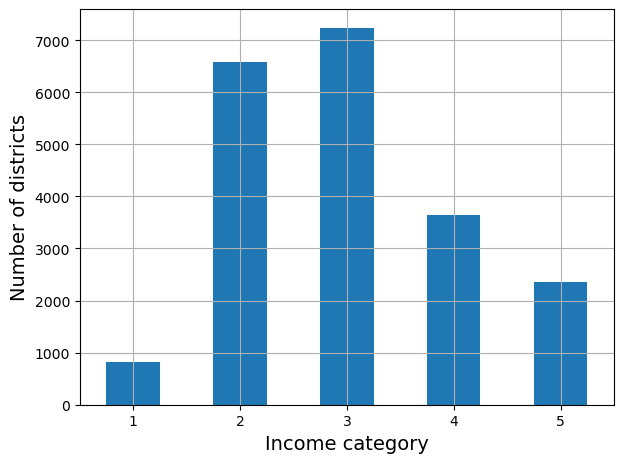

In [22]:
housing["income_cat"].value_counts().sort_index().plot(
    kind="bar", rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")
plt.show()


In [23]:
# O código a seguir gera 10 divisões estratificadas diferentes do mesmo conjunto de dados:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])


# Usando apenas uma divisao
strat_train_set, strat_test_set = strat_splits[0]


In [24]:
# Como a amostragem estratificada é bastante comum, há uma maneira mais curta de obter uma única divisão usando a train_test_split() função com o stratif como argumento
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)


In [25]:
(strat_test_set["income_cat"].value_counts() /
 len(strat_test_set)).sort_index()


1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64

Com um código semelhante, você pode medir as proporções da categoria de renda no conjunto de dados completo. Abaixo podemos comparar as proporções das categorias de renda no conjunto de dados geral, no conjunto de teste gerado com amostragem estratificada e em um conjunto de teste gerado usando amostragem puramente aleatória. Como você pode ver, o conjunto de teste gerado usando amostragem estratificada tem proporções de categoria de renda quase idênticas às do conjunto de dados completo, enquanto o conjunto de teste gerado usando amostragem puramente aleatória é distorcido.

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)


,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [27]:
# Dropando colunas income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


<h2> Descubra e visualize os dados para obter insights </h2>

In [28]:
housing = strat_train_set.copy()


<h3> Visualizando Geographical Data</h3>

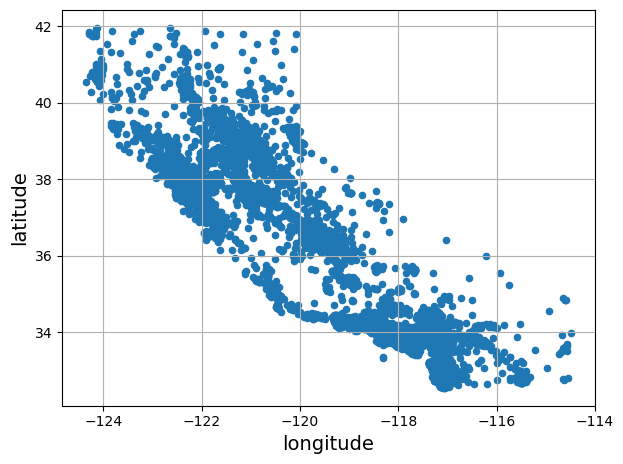

In [29]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()


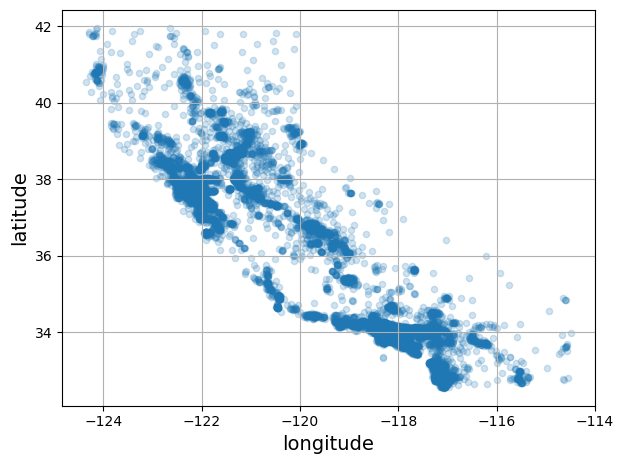

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()


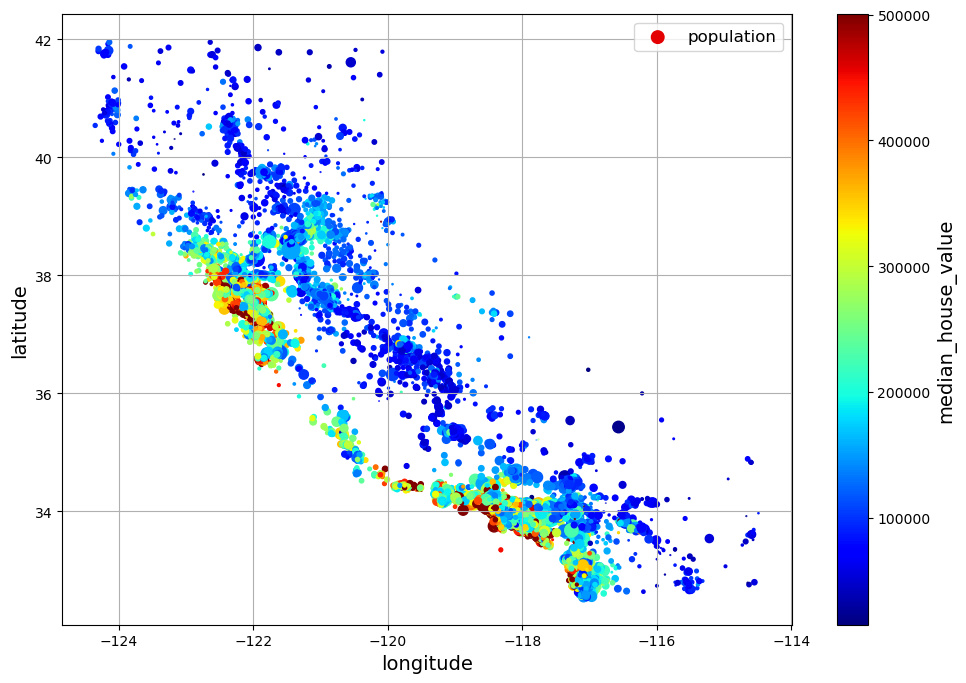

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()


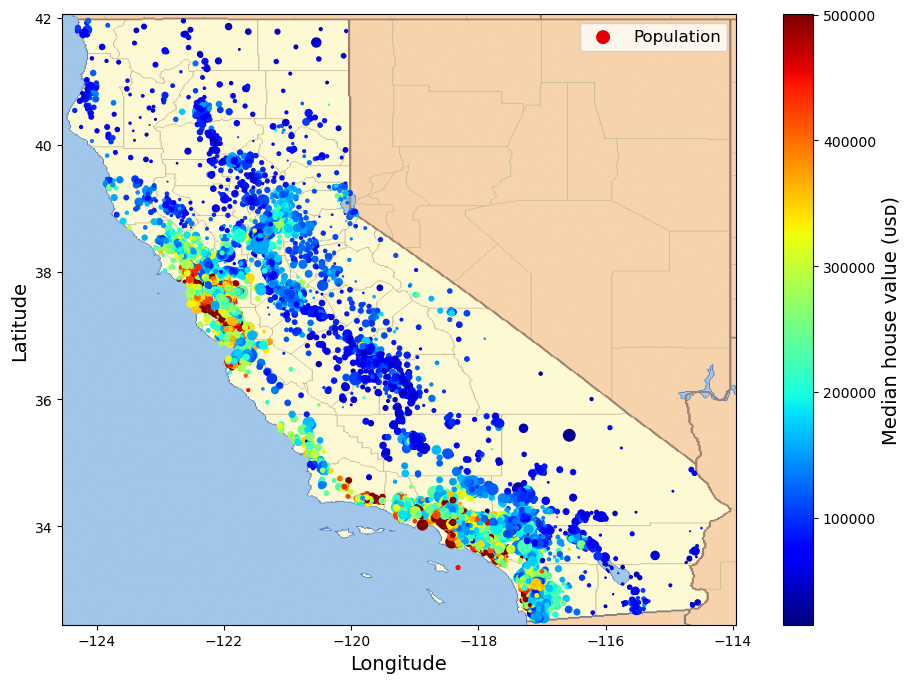

In [32]:
# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
    kind="scatter", x="Longitude", y="Latitude",
    s=housing_renamed["Population"] / 100, label="Population",
    c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()


<h3>Procurando por Correlações</h3>
Como o conjunto de dados não é muito grande, você pode calcular facilmente o coeficiente de correlação padrão (também chamado de r de Pearson ) entre cada par de atributos usando o corr() método:


In [33]:
corr_matrix = housing.corr()


In [34]:
# Agora vamos ver o quanto cada atributo se correlaciona com o valor médio da casa:

corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

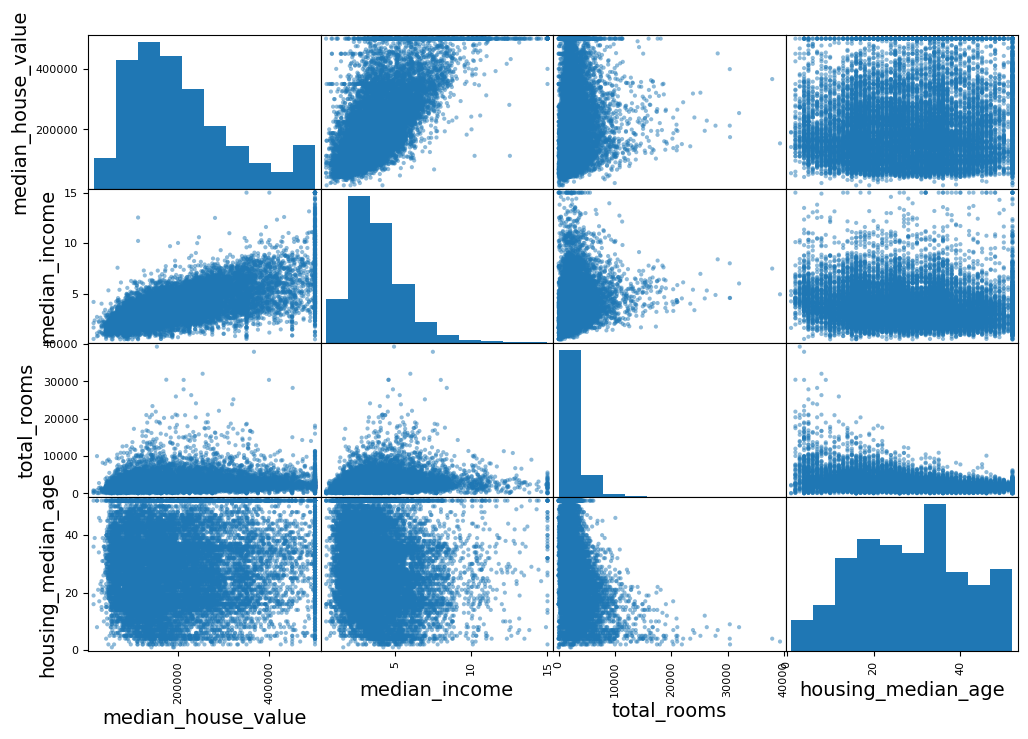

In [35]:
# Outra maneira de verificar a correlação entre os atributos é usar a scatter_matrix()função Pandas,
#  que plota cada atributo numérico em relação a todos os outros atributos numéricos.
# Como agora existem 11 atributos numéricos, você obteria 11 2 = 121 gráficos, que não caberiam em uma página,
# então vamos nos concentrar apenas em alguns atributos promissores que parecem mais correlacionados com o valor médio da habitação

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


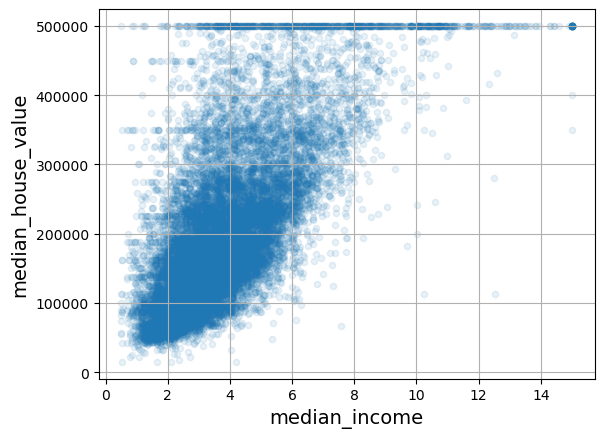

In [36]:
# Olhando para os gráficos de dispersão de correlação, parece que o atributo mais promissor para prever o valor médio da casa é a renda mediana,
# então vamos ampliar o gráfico de dispersão

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()


Este enredo revela algumas coisas. Primeiro, a correlação é realmente muito forte; você pode ver claramente a tendência de alta, e os pontos não estão muito dispersos. Em segundo lugar, o teto de preço que notamos anteriormente é claramente visível como uma linha horizontal em US$ 500.000. Mas esse gráfico revela outras linhas retas menos óbvias: uma linha horizontal em torno de US$ 450.000, outra em torno de US$ 350.000, talvez uma em torno de US$ 280.000 e algumas mais abaixo disso. Você pode tentar remover os distritos correspondentes para evitar que seus algoritmos aprendam a reproduzir essas peculiaridades de dados.



<h3> Experimento combinações de Atributos </h3>

In [37]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

O novo bedrooms_ratioa tributo está muito mais correlacionado com o valor médio da casa do que com o número total de cômodos ou quartos. Aparentemente, casas com uma relação quarto/quarto menor tendem a ser mais caras. O número de cômodos por domicílio também é mais informativo do que o número total de cômodos em um distrito – obviamente, quanto maiores as casas, mais caras elas são.<br>
Essa rodada de exploração não precisa ser absolutamente completa; o ponto é começar com o pé direito e obter rapidamente insights que o ajudarão a obter um primeiro protótipo razoavelmente bom. Mas este é um processo iterativo: depois de colocar um protótipo em funcionamento, você pode analisar sua saída para obter mais informações e voltar a esta etapa de exploração.



<h3>Preparar os dados para utilizar ML</h3>


In [39]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [40]:
# Data Clean

# housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

# housing.drop("total_bedrooms", axis=1)       # option 2

# median = housing["total_bedrooms"].median()  # option 3

# housing["total_bedrooms"].fillna(median, inplace=True)


# Para cada opção, criaremos uma cópia da caixa e trabalharemos nessa cópia para evitar a quebra da caixa.
# Também mostraremos a saída de cada opção, mas filtrando as linhas que originalmente continham um valor NaN.


In [41]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [42]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [43]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [44]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


Há também imputadores mais poderosos disponíveis no sklearn.imputepacote (ambos apenas para recursos numéricos):<br>
* KNNImputersubstitui cada valor ausente pela média dos valores dos k vizinhos mais próximos para esse recurso. A distância é baseada em todos os recursos disponíveis.
* IterativeImputer treina um modelo de regressão por recurso para prever os valores ausentes com base em todos os outros recursos disponíveis. Em seguida, ele treina o modelo novamente com os dados atualizados e repete o processo várias vezes, melhorando os modelos e os valores de substituição a cada iteração.

In [46]:
# Separating out the numerical attributes to use the "median" strategy:
housing_num = housing.select_dtypes(include=[np.number])


In [47]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [48]:
print(imputer.statistics_)

# Verifique se isso é o mesmo que calcular manualmente a mediana de cada atributo:

housing_num.median().values


[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [49]:
X = imputer.transform(housing_num)


In [50]:

imputer.feature_names_in_


array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [51]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [52]:
# Estrategia usada
imputer.strategy


'median'

In [53]:
# Indices onde os valores era NaN
housing_tr.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


<b>Agora vamos eliminar alguns outliers:</b>

In [54]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred


array([-1,  1,  1, ...,  1,  1,  1])

In [55]:
# Se você quisesse eliminar outliers, você executaria o seguinte código:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]


<h2> Manipulando Texto e Atributos Categóricos </h2>


In [56]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)


,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [57]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)


In [58]:

housing_cat_encoded[:8]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [59]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Um problema com essa representação é que os algoritmos de ML assumirão que dois valores próximos são mais semelhantes do que dois valores distantes. Isso pode ser bom em alguns casos (por exemplo, para categorias ordenadas como "ruim", "médio", "bom" e "excelente"), mas obviamente não é o caso da ocean_proximitycoluna (por exemplo, categorias 0 e 4 são claramente mais semelhantes do que as categorias 0 e 1). Para corrigir esse problema, uma solução comum é criar um atributo binário por categoria: <b>OneHotEncoder</b>

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())

print("categories: ", cat_encoder.categories_)


[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
categories:  [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [61]:
# Tambem utiliza one-hot

df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)


,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [62]:
cat_encoder.transform(df_test).toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)


,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [64]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [65]:
cat_encoder.feature_names_in_


array(['ocean_proximity'], dtype=object)

In [66]:
cat_encoder.get_feature_names_out()


array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [67]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


<h3>Dimensionamento e Transformação de Recursos</h3>

Há duas maneiras comuns de fazer com que todos os atributos tenham a mesma escala: dimensionamento mínimo-máximo e padronização .
* O escalonamento mínimo-máximo (muitas pessoas chamam isso de normalização ) é o mais simples: para cada atributo, os valores são deslocados e redimensionados para que acabem variando de 0 a 1. O Scikit-Learn fornece um transformador chamado MinMaxScalerpara isso.
* Ao contrário do dimensionamento mínimo-máximo, a padronização não vincula valores a um intervalo específico. No entanto, a padronização é muito menos afetada por outliers. 
<b>Media:0; std=1;</b>

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Podemos definir o range
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)


In [69]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


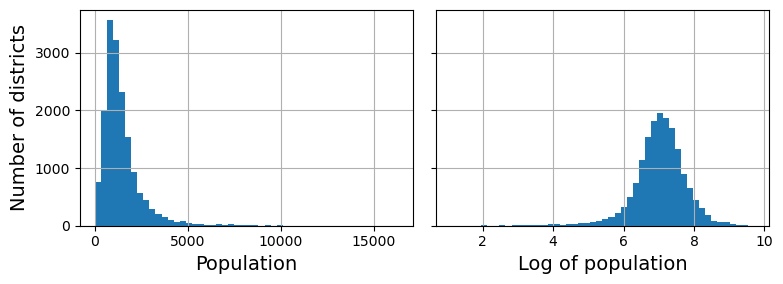

In [70]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()


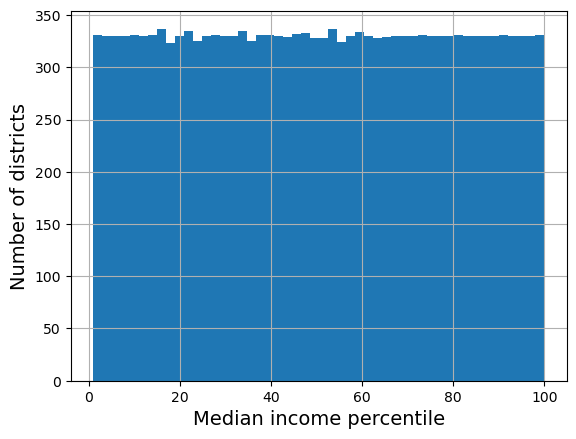

In [71]:
# E se substituirmos cada valor com seu percentil

# Calculando percis [1 a 100]
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]

# range de bins, primeiro item menos infinito ultimo mais infinito
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))

flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()


<p>O Recurso Population segue aproximadamente uma lei de potência: distritos com 10.000 habitantes são apenas 10 vezes menos frequentes do que distritos com 1.000 habitantes, não exponencialmente menos frequentes. A figura acima mostra como esse recurso fica melhor quando você calcula seu logaritmo: é muito próximo de uma distribuição gaussiana (ou seja, em forma de sino). </p>
<p>Outra abordagem para lidar com recursos de cauda pesada consiste em agrupar o recurso. Isso significa dividir sua distribuição em buckets de tamanhos aproximadamente iguais e substituir cada valor de recurso pelo índice do bucket ao qual ele pertence, assim como fizemos para criar o <b>income_catrecurso</b> (embora o tenhamos usado apenas para amostragem estratificada). Por exemplo, você pode substituir cada valor por seu percentil. A segmentação com buckets de tamanhos iguais resulta em um recurso com uma distribuição quase uniforme, portanto, não há necessidade de dimensionamento adicional ou você pode simplesmente dividir pelo número de buckets para forçar os valores para o intervalo de 0 a 1. </p>
<p>Quando um recurso tem uma distribuição multimodal (ou seja, com dois ou mais picos claros, chamados de modos ), como o housing_median_agerecurso, também pode ser útil dividi-lo em intervalos, mas desta vez tratando os IDs dos blocos como categorias, em vez de valores numéricos . Isso significa que os índices de bucket devem ser codificados, por exemplo, usando um OneHotEncoder(portanto, você geralmente não deseja usar muitos buckets). Essa abordagem permitirá que o modelo de regressão aprenda mais facilmente regras diferentes para diferentes intervalos desse valor de recurso. Por exemplo, talvez as casas construídas há cerca de 35 anos tenham um estilo peculiar que saiu de moda e, portanto, são mais baratas do que a idade sugere.</p>
<p>Outra abordagem para transformar distribuições multimodais é adicionar uma característica para cada um dos modos (pelo menos os principais), representando a semelhança entre a idade mediana da habitação e aquele modo particular. A medida de similaridade é tipicamente calculada usando uma Função de Base Radial (RBF): esta é qualquer função que depende apenas da distância entre o valor de entrada e um ponto fixo. O RBF mais comumente usado é o RBF Gaussiano cujo valor de saída decai exponencialmente à medida que o valor de entrada se afasta do ponto fixo. Por exemplo, a similaridade gaussiana RBF entre a idade da habitação x e 35 é dada pela equação exp(- x_ - 35)²). O hiperparâmetro gama) determina a rapidez com que a medida de similaridade decai quando xse afasta de 35. Usando a rbf_kernel()função do Scikit-Learn, podemos criar um novo recurso Gaussian RBF medindo a semelhança entre a idade mediana da habitação e 35:</p>


In [72]:

from sklearn.metrics.pairwise import rbf_kernel

# novo recurso Gaussian RBF medindo a semelhança entre a idade mediana da habitação e 35
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)


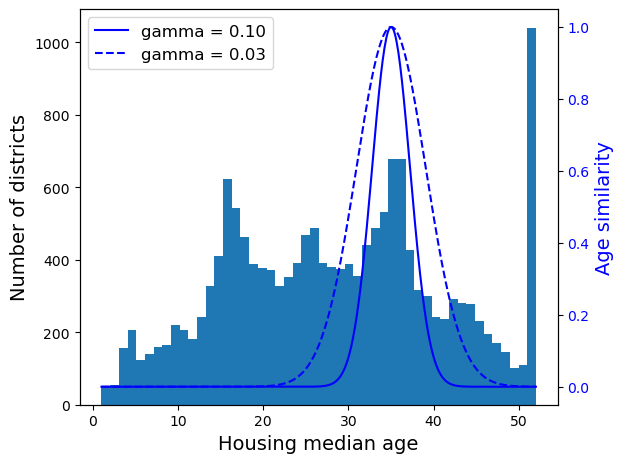

In [73]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)


gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()


<p>O grafico acima mostra esse novo recurso em função da idade mediana da habitação (linha contínua). Também mostra como seria o recurso se usássemos um gamma valor menor. Como mostra o gráfico, o novo recurso de similaridade de idade atinge o pico aos 35 anos, exatamente em torno do pico na distribuição de idade mediana da habitação: se essa faixa etária específica estiver bem correlacionada com preços mais baixos, há uma boa chance de que esse novo recurso ajude.

</p>

</b>Para voltar a escala original utilizar o inverse_transform()método do escalador treinado. exemplo abaixo</b>

In [74]:
from sklearn.linear_model import LinearRegression


target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions


array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

<p>Isso funciona bem, mas há uma maneira mais simples: podemos usar um arquivo TransformedTargetRegressor. Só precisamos construí-lo, dando-lhe o modelo de regressão e o transformador de rótulos, depois ajustá-lo no conjunto de treinamento, usando os rótulos originais sem escala. </p>

In [75]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)


In [76]:
predictions


array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

<h3>Transformadores personalizados</h3>

Embora o Scikit-Learn forneça muitos transformadores úteis, você precisará escrever seus próprios para tarefas como transformações personalizadas, operações de limpeza ou combinação de atributos específicos.



In [77]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])


In [78]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])


In [79]:
age_simil_35


array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [80]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])


In [81]:
sf_simil


array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [82]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))


array([[0.5 ],
       [0.75]])

<p>FunctionTransformer é muito útil, mas e se você quiser que seu transformador seja treinável, aprendendo alguns parâmetros no fit() método e usando-os posteriormente no transform().Para isso, você precisa escrever uma classe personalizada. O Scikit-Learn depende da tipagem de pato, portanto, essa classe não precisa herdar de nenhuma classe base específica: tudo o que precisa são três métodos: fit()(que devem retornar self), transform(), e fit_transform().</p>
<ul>TransformerMixin: Classe Base -> fit() e transform()</ul>
<ul>BaseEstimator: Classe Base :  (e evitar usar *argse **kwargsem seu construtor) -> get_params() e set_params()




In [83]:

# Por exemplo, aqui está um transformador personalizado que age de forma muito parecida com o StandardScaler:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        # checks that X is an array with finite float values
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        # every estimator stores this in fit()
        self.n_features_in_ = X.shape[1]
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_


Aqui estão algumas coisas a serem observadas:


O sklearn.utils.validation pacote contém várias funções que podemos usar para validar as entradas. Para simplificar, vamos pular esses testes no restante deste livro, mas o código de produção deve tê-los.

Os pipelines do Scikit-Learn exigem que o fit()método tenha dois argumentos Xe y, e é por isso que precisamos do y=Noneargumento mesmo que não usemos y.

Todos os estimadores do Scikit-Learn são definidos n_features_in_no fit()método e garantem que os dados sejam passados transform()​​ou predict()tenham esse número de recursos.

O fit()método deve retornar self.

Esta implementação não está 100% completa: todos os estimadores devem ser configurados feature_names_in_no fit()método quando são passados ​​um DataFrame. Além disso, todos os transformadores devem fornecer um get_feature_names_out()método, bem como um inverse_transform()método quando sua transformação pode ser revertida. Veja o último exercício no final deste capítulo para mais detalhes.

<p><b>Um transformador personalizado pode (e geralmente usa) outros estimadores em sua implementação. Por exemplo, abaixo vemos um transformador personalizado que usa um KMeansclusterer no fit()método para identificar os principais clusters nos dados de treinamento e, em seguida, usa rbf_kernel()no transform()método para medir a semelhança de cada amostra com cada centro de cluster:
</p><b>


In [84]:
from sklearn.cluster import KMeans


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [85]:
# ClusterSimilarity transformador, definindo o número de clusters para 10 clusters. Em seguida, ele chama fit_transform()com a latitude e longitude de cada
# distrito no conjunto de treinamento, ponderando cada distrito pelo valor médio da casa. O transformador usa K-Means para localizar os clusters e, em seguida,
# mede a similaridade gaussiana RBF entre cada distrito e todos os 10 centros de cluster. O resultado é uma matriz com uma linha por distrito e uma coluna por cluster.
# Vejamos as 3 primeiras linhas, arredondando para 2 casas decimais:

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
similarities[:3].round(2)


array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

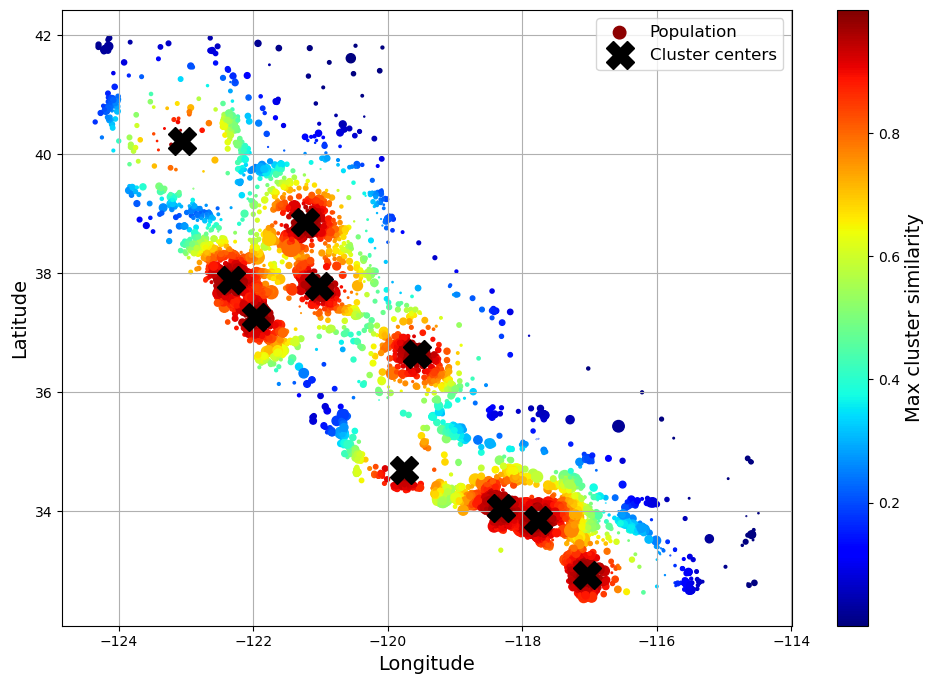

In [86]:
# mostra os 10 centros de cluster encontrados pelo K-Means. Os distritos são coloridos de acordo com sua semelhança geográfica com o
# centro do cluster mais próximo. Como você pode ver, a maioria dos clusters está localizada em áreas altamente populosas e caras.

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)
housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()


<h3> Pipelines de transformação </h3>
<p>Agora vamos construir um pipeline para pré-processar os atributos numéricos:</p>

<p>O Pipeline construtor recebe uma lista de pares nome/estimador (2-tuplas) definindo uma sequência de etapas. Os nomes podem ser o que você quiser</p>

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Comando para mostrar sklearn como disgram
sklearn.set_config(display="diagram")

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_pipeline


Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

<p>Se você não quiser se incomodar em nomear os transformadores, você pode usar a make_pipeline() função: ela apenas recebe os transformadores como argumentos posicionais 
e cria um Pipelineusando os nomes das classes dos transformadores, em letras minúsculas e sem sublinhados (por exemplo, “ simpleimputer)</p>

In [88]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(
    strategy="median"), StandardScaler())


In [89]:
from sklearn import set_config

set_config(display="dict")

num_pipeline


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [90]:
# Utilizando o pipeline
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)


array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [91]:
# Recuperar um DataFrame, pode usar o método get_feature_names_out() do pipeline:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)
df_housing_num_prepared.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [92]:
num_pipeline.steps


[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [93]:
# Setar/Mudar estimador pipeline
num_pipeline.set_params(simpleimputer__strategy="median")


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

<b>Seria mais conveniente ter um único transformador capaz de lidar com todas as colunas, aplicando as transformações apropriadas a cada coluna</b>
<p> ColumnTransformer  aplicará num_pipeline (o que acabamos de definir) aos atributos numéricos e cat_pipeline ao atributo categórico:</p>


In [94]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

<p>Como listar todos os nomes das colunas não é muito conveniente, o Scikit-Learn fornece uma função make_column_selector() que retorna uma função seletora que você pode usar para escolher os nomes (como make_pipeline())</p>


In [95]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

housing_prepared = preprocessing.fit_transform(housing)


In [96]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)


,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


Nota: O OneHotEncoder retorna uma matriz esparsa, enquanto o num_pipeline retorna uma matriz densa. Quando há uma mistura de matrizes esparsas e densas, o ColumnTransformer estima a densidade da matriz final (ou seja, a proporção de células diferentes de zero) e retorna uma matriz esparsa se a densidade for menor que um determinado limite  (by default, sparse_threshold=0.3). In this example, it returns a dense matrix.

<h3>Recaptulação do pipeline</h3>
<ul> Os valores ausentes em recursos numéricos serão imputados substituindo-os pela mediana, pois a maioria dos algoritmos de ML não espera valores ausentes. Quanto ao recurso categórico, quaisquer valores ausentes serão substituídos pela categoria mais frequente.</ul>
<ul>O recurso categórico será codificado em um hot, pois a maioria dos algoritmos de ML aceita apenas entradas numéricas</ul>
<ul>Alguns recursos de proporção serão computados e adicionados: bedrooms_ratio, rooms_per_house and people_per_house. Esperamos que eles se correlacionem melhor com o valor médio da habitação e, assim, ajudem os modelos de ML.</ul>
<ul>Alguns recursos de similaridade de cluster também serão adicionados. Estes provavelmente serão mais úteis para o modelo do que latitude e longitude.</ul>
<ul>Recursos com cauda longa serão substituídos por seu logaritmo, pois a maioria dos modelos prefere recursos com distribuições aproximadamente uniformes ou gaussianas</ul>
<ul>Todos os recursos numéricos serão padronizados, pois a maioria dos algoritmos de ML prefere quando todos os recursos têm aproximadamente a mesma escala.</ul>

<strong>O código que cria o pipeline para fazer tudo esta na celula abaixo</strong>


In [120]:
def column_ratio(X): #Divide uma coluna por outra
    return X[:, [0]] / X[:, [1]]


def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out


def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age


In [118]:
housing[["total_bedrooms", "total_rooms"]].values[:, [0]][0] / housing[["total_bedrooms", "total_rooms"]].values[:, [0]][0]

array([1.])

In [121]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [122]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

<h3> Select and Train a Model</h3>


<b>Treinamento e avaliação no conjunto de treinamento</b>

<p>A boa notícia é que, graças a todas essas etapas anteriores, as coisas agora serão fáceis. Podemos criar um modelo de Regressão Linear muito básico para começar;</p>

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                    

In [135]:
# 5 predictions and comparing them to the labels:
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(-2))  # -2 = rounded to the nearest hundred
print(housing_labels.iloc[:5].values)

[243700. 372200. 128600.  94400. 328500.]
[458300. 483800. 101700.  96100. 361800.]


In [136]:

# extra code – computes the error ratios discussed in the book
error_ratios  = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.8%, -23.1%, 26.5%, -1.8%, -9.2%


Lembre-se que você escolheu usar o RMSE como sua medida de desempenho, então você quer medir o RMSE deste modelo de regressão em todo o conjunto de treinamento usando a função mean_squared_error() do Scikit-Learn, com o argumento quadrado definido como Fals

In [137]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse


68688.10163668486

 Os valores median_housing_values ​​da maioria dos distritos variam entre US$ 120.000 e US$ 265.000, portanto, um erro de previsão típico de US$ 68.628 não é muito satisfatório.
